In [1]:
# load libraries
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# set the filepath and load in a shapefile
fp = "C:\\Users\\scyew\\OneDrive\\Desktop\\axiata_urbanlytics\\shape.shp"

map_df = gpd.read_file(fp)

In [3]:
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,grid_id,geometry
0,159117.0,"POLYGON ((101.6391197006636 2.88681056372882, ..."
1,159118.0,"POLYGON ((101.6413674050592 2.886291436419907,..."
2,159119.0,"POLYGON ((101.6436151094493 2.88655105061499, ..."
3,159120.0,"POLYGON ((101.6458628138338 2.886810664809432,..."
4,159121.0,"POLYGON ((101.6481105182128 2.887070279003228,..."


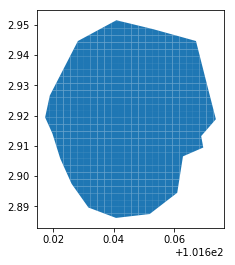

In [4]:
# now let's preview what our map looks like with no data in it
map_df.plot()

In [42]:
# load in new csv file
df = pd.read_csv("C:\\Users\\scyew\\OneDrive\\Desktop\\axiata_urbanlytics\\converted_date_time.csv")
df.head()

,customer_id,grid_id,date_time,date,time
0,h092861261790079492,166839,19/7/2019 7:30,2019-07-19,730
1,k438071835109624353,168252,19/7/2019 7:31,2019-07-19,731
2,1.4817E+18,179477,19/7/2019 7:36,2019-07-19,736
3,5.36893E+18,170354,19/7/2019 7:36,2019-07-19,736
4,u832408493379095560,175968,19/7/2019 7:39,2019-07-19,739


In [43]:
# select only the coluns that we want for the map
df = df[['customer_id','grid_id', 'date', 'time']]

# check dat dataframe
df.head()

,customer_id,grid_id,date,time
0,h092861261790079492,166839,2019-07-19,730
1,k438071835109624353,168252,2019-07-19,731
2,1.4817E+18,179477,2019-07-19,736
3,5.36893E+18,170354,2019-07-19,736
4,u832408493379095560,175968,2019-07-19,739


In [35]:
R1_grid = [173860.0,173861.0,173159.0,173160.0,173161.0,172459.0,172460.0,172461.0,172462.0,172463.0,172464.0]
R2_grid = [173860.0, 173859.0,173157.0,172455.0,171753.0,171051.0,170349.0,169647.0,168945.0,168243.0,167541.0,166839.0,166137.0,165435.0]
R3_grid = [165435.0,165436.0,165437.0,165438.0,166140.0,166141.0,166843.0,166844.0,166845.0,166846.0,166847.0,166848.0,166849.0]
R4_grid = [166847.0,167549.0,167550.0,168252.0,168954.0,169656.0,170358.0,171060.0,171762.0,172464.0]
R5_grid = [170361.0,170360.0,171061.0,170359.0,170358.0,170357.0,170356.0,170355.0,169653.0,169652.0,169651.0,170353.0,170352.0,170351.0,170350.0,170349.0,170348.0,169645.0,169644.0]
R6_grid = [166844.0,167546.0,168248.0,168247.0,168949.0,169651.0,170353.0,171055.0,171757.0,171756.0,172458.0,173160]
Route_grid = R1_grid + R2_grid + R3_grid + R4_grid + R5_grid + R6_grid

In [44]:
df_route = df[df.grid_id.isin(Route_grid)]
df_route.head()

,customer_id,grid_id,date,time
0,h092861261790079492,166839,2019-07-19,730
1,k438071835109624353,168252,2019-07-19,731
7,k642213000541829876,169656,2019-07-19,743
8,2.86971E+17,166141,2019-07-19,744
20,q901395210906320999,169647,2019-07-19,751


In [45]:
df_filtered = df_route[(df_route['time'] >= 1200) & (df_route['time'] <= 1400)]
df_filtered.head()

,customer_id,grid_id,date,time
17407,8.98552E+18,171051,2019-07-19,1200
17409,z817363553362291439,168252,2019-07-19,1200
17410,8.67096E+18,169644,2019-07-19,1200
17411,h305083402010947389,173159,2019-07-19,1200
17412,3.41584E+18,170350,2019-07-19,1200


In [46]:
df_filtered['countdensity'] = df_filtered.groupby('grid_id')['grid_id'].transform('count')
df_filtered.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,customer_id,grid_id,date,time,countdensity
17407,8.98552E+18,171051,2019-07-19,1200,4381
17409,z817363553362291439,168252,2019-07-19,1200,2905
17410,8.67096E+18,169644,2019-07-19,1200,1573
17411,h305083402010947389,173159,2019-07-19,1200,4142
17412,3.41584E+18,170350,2019-07-19,1200,3533


In [47]:
df_filtered["countcustomer"] = df_filtered.groupby("customer_id")["customer_id"].transform("count")
df_filtered["movement"] = np.where(df_filtered["countcustomer"]==1, 0, 1)
print(df_filtered.head())

               customer_id  grid_id        date  time  countdensity  \
17407          8.98552E+18   171051  2019-07-19  1200          4381   
17409  z817363553362291439   168252  2019-07-19  1200          2905   
17410          8.67096E+18   169644  2019-07-19  1200          1573   
17411  h305083402010947389   173159  2019-07-19  1200          4142   
17412          3.41584E+18   170350  2019-07-19  1200          3533   

       countcustomer  movement  
17407             19         1  
17409             41         1  
17410             32         1  
17411             16         1  
17412             21         1  


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
df_filtered["dailycount"] = df_filtered.groupby("date")["date"].transform("count")
print(df_filtered.head())
df_filtered.dtypes

               customer_id  grid_id        date  time  countdensity  \
17407          8.98552E+18   171051  2019-07-19  1200          4381   
17409  z817363553362291439   168252  2019-07-19  1200          2905   
17410          8.67096E+18   169644  2019-07-19  1200          1573   
17411  h305083402010947389   173159  2019-07-19  1200          4142   
17412          3.41584E+18   170350  2019-07-19  1200          3533   

       countcustomer  movement  dailycount  
17407             19         1       10643  
17409             41         1       10643  
17410             32         1       10643  
17411             16         1       10643  
17412             21         1       10643  


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


customer_id      object
grid_id           int64
date             object
time              int64
countdensity      int64
countcustomer     int64
movement          int32
dailycount        int64
dtype: object

In [49]:
df_moving = df_filtered[df_filtered["movement"]==1]
df_moving = df_moving.pivot_table(index = ['grid_id'], columns = 'date', 
               aggfunc='size', fill_value=0).reset_index()
df_moving.head()

date,grid_id,2019-07-19,2019-07-20,2019-07-21,2019-07-22,2019-07-23,2019-07-24,2019-07-25,2019-07-26,2019-07-27,...,2019-08-17,2019-08-18,2019-08-19,2019-08-20,2019-08-21,2019-08-22,2019-08-24,2019-08-25,2019-08-26,2019-08-27
0,165435,190,6,4,160,185,174,174,173,5,...,8,6,0,0,0,0,0,0,0,0
1,165436,173,4,5,148,153,155,161,143,9,...,3,4,0,0,0,0,0,0,0,0
2,165437,153,6,9,151,173,156,163,154,7,...,8,9,0,0,0,0,0,0,0,0
3,165438,173,10,8,150,149,177,161,161,10,...,8,7,0,0,0,0,0,0,0,0
4,166137,186,5,8,137,163,171,167,165,6,...,7,10,0,0,0,0,0,0,0,0


In [58]:
df_static_customer = df_filtered[df_filtered["movement"]==0]
df_static_customer['countppl'] = df_static_customer.groupby('grid_id')['grid_id'].transform('count')
df_static_customer.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,customer_id,grid_id,date,time,countdensity,countcustomer,movement,dailycount,countppl
17446,r549428792713758671,170353,2019-07-19,1200,3980,1,0,10643,402
17462,4.55469E+18,172460,2019-07-19,1200,3210,1,0,10643,136
17468,8.27865E+18,169653,2019-07-19,1200,3110,1,0,10643,259
17521,m438603428438203552,171061,2019-07-19,1200,1353,1,0,10643,258
17531,q887671189460958482,166839,2019-07-19,1200,3668,1,0,10643,249


In [59]:
df_static = df_filtered[df_filtered["movement"]==0]
df_static = df_static.pivot_table(index = ['grid_id'], columns = 'date', 
               aggfunc='size', fill_value=0).reset_index()
#df_static = df_static.astype(int)

In [60]:
# join the geodataframe with the cleaned up csv dataframe
#merged = map_df.set_index('grid_id').join(df.set_index('borough'))
merged_moving = pd.merge(map_df, df_moving, on ='grid_id', how ='outer')
merged_moving.head()

,grid_id,geometry,2019-07-19,2019-07-20,2019-07-21,2019-07-22,2019-07-23,2019-07-24,2019-07-25,2019-07-26,...,2019-08-17,2019-08-18,2019-08-19,2019-08-20,2019-08-21,2019-08-22,2019-08-24,2019-08-25,2019-08-26,2019-08-27
0,159117.0,"POLYGON ((101.6391197006636 2.88681056372882, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,159118.0,"POLYGON ((101.6413674050592 2.886291436419907,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,159119.0,"POLYGON ((101.6436151094493 2.88655105061499, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,159120.0,"POLYGON ((101.6458628138338 2.886810664809432,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,159121.0,"POLYGON ((101.6481105182128 2.887070279003228,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
merged_static = pd.merge(map_df, df_static, on ='grid_id', how ='outer')
merged_static.head()

,grid_id,geometry,2019-07-19,2019-07-20,2019-07-23,2019-07-25,2019-07-26,2019-07-27,2019-07-28,2019-07-29,...,2019-08-17,2019-08-18,2019-08-19,2019-08-20,2019-08-21,2019-08-22,2019-08-24,2019-08-25,2019-08-26,2019-08-27
0,159117.0,"POLYGON ((101.6391197006636 2.88681056372882, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,159118.0,"POLYGON ((101.6413674050592 2.886291436419907,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,159119.0,"POLYGON ((101.6436151094493 2.88655105061499, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,159120.0,"POLYGON ((101.6458628138338 2.886810664809432,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,159121.0,"POLYGON ((101.6481105182128 2.887070279003228,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
merged = pd.merge(map_df, df_filtered, on ='grid_id', how ='outer')
merged.head()

,grid_id,geometry,customer_id,date,time,countdensity,countcustomer,movement,dailycount
0,159117.0,"POLYGON ((101.6391197006636 2.88681056372882, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,159118.0,"POLYGON ((101.6413674050592 2.886291436419907,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,159119.0,"POLYGON ((101.6436151094493 2.88655105061499, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,159120.0,"POLYGON ((101.6458628138338 2.886810664809432,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,159121.0,"POLYGON ((101.6481105182128 2.887070279003228,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


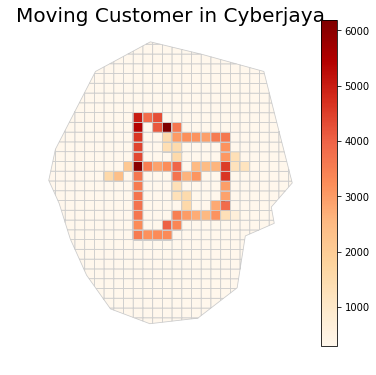

In [71]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'countdensity' 

# set the range for the choropleth
vmin, vmax = merged['countdensity'].min(), merged['countdensity'].max()

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(6, 6))

# create map
merged.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Moving Customer in Cyberjaya', \
              fontdict={'fontsize': '20',
                        'fontweight' : '3'})

# create an annotation for the  data source
#ax.annotate('Source: London Datastore, 2014',
           #xy=(0.1, .08), xycoords='figure fraction',
           #horizontalalignment='left', verticalalignment='top',
           #fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)

In [63]:
merged_2 = pd.merge(map_df, df_static_customer, on ='grid_id', how ='outer')
merged_2.head()

,grid_id,geometry,customer_id,date,time,countdensity,countcustomer,movement,dailycount,countppl
0,159117.0,"POLYGON ((101.6391197006636 2.88681056372882, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,159118.0,"POLYGON ((101.6413674050592 2.886291436419907,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,159119.0,"POLYGON ((101.6436151094493 2.88655105061499, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,159120.0,"POLYGON ((101.6458628138338 2.886810664809432,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,159121.0,"POLYGON ((101.6481105182128 2.887070279003228,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


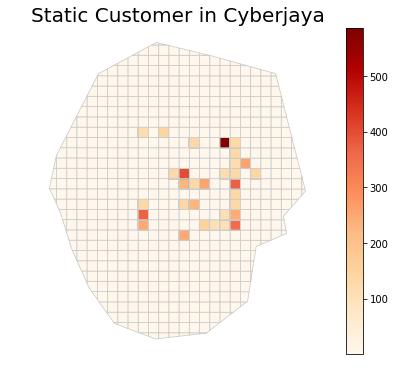

In [72]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'countppl' 

# set the range for the choropleth
vmin, vmax = merged_2['countppl'].min(), merged_2['countppl'].max()

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged_2.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Static Customer in Cyberjaya', \
              fontdict={'fontsize': '20',
                        'fontweight' : '3'})

# create an annotation for the  data source
#ax.annotate('Source: London Datastore, 2014',
           #xy=(0.1, .08), xycoords='figure fraction',
           #horizontalalignment='left', verticalalignment='top',
           #fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap2.png', dpi=300)

In [76]:
# save all the maps in the charts folder
output_path = 'C:\\Users\\scyew\\OneDrive\\Desktop\\axiata_urbanlytics'

# counter for the for loop
i = 0

list_of_date = list(merged_moving.columns.values) 
list_of_date = list_of_date[2:]

In [77]:
# set the min and max range for the choropleth map
vmin, vmax = merged['countdensity'].min(), merged['countdensity'].max()

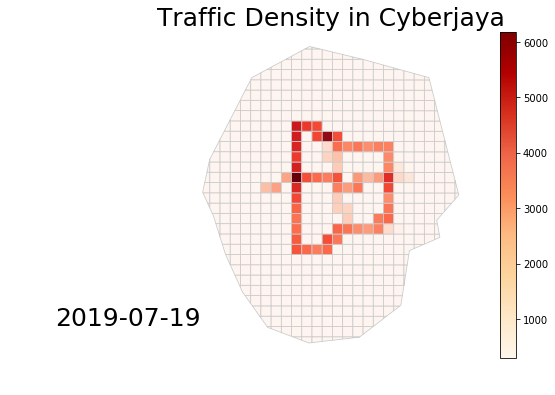

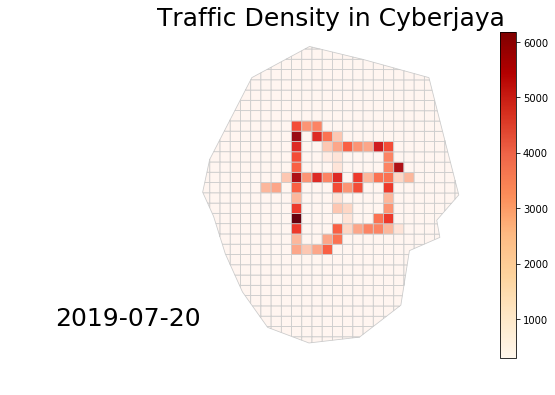

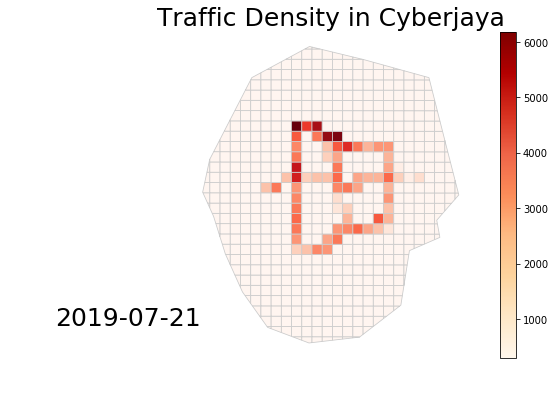

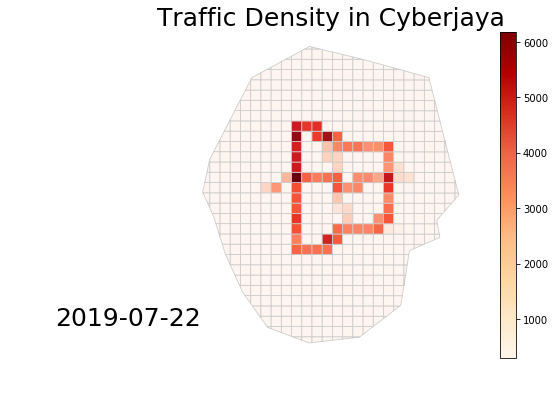

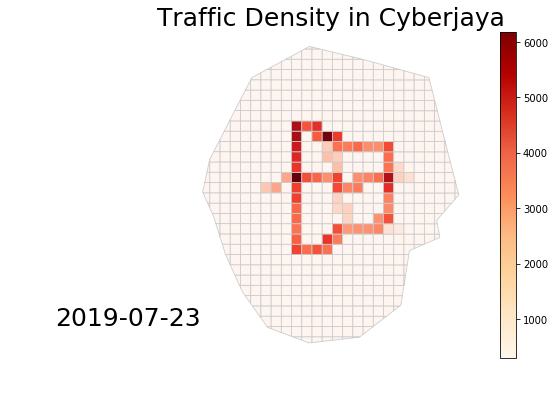

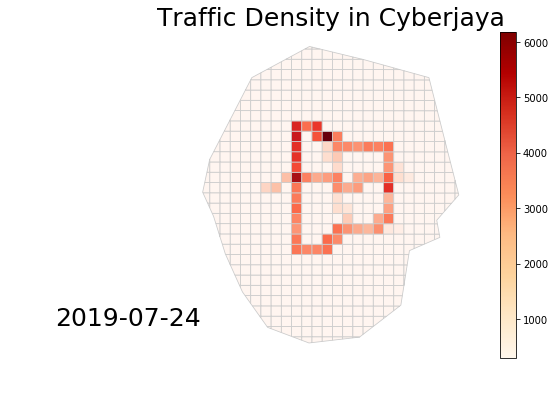

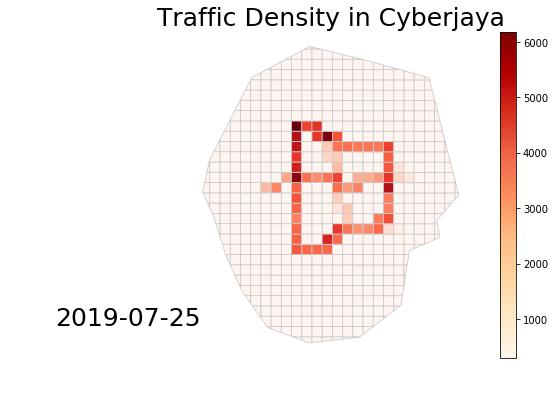

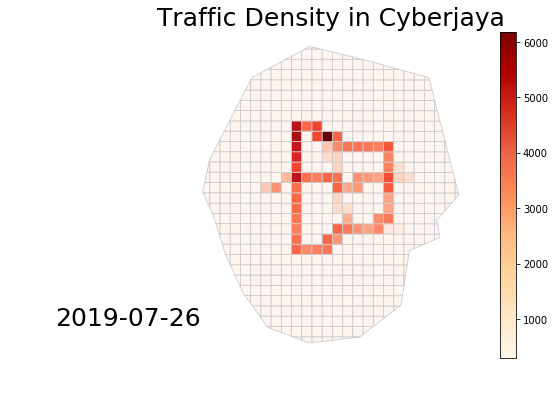

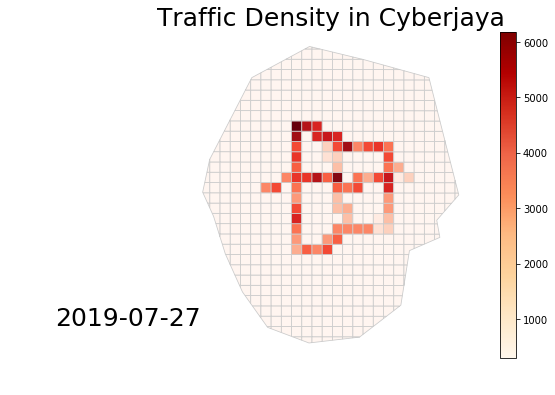

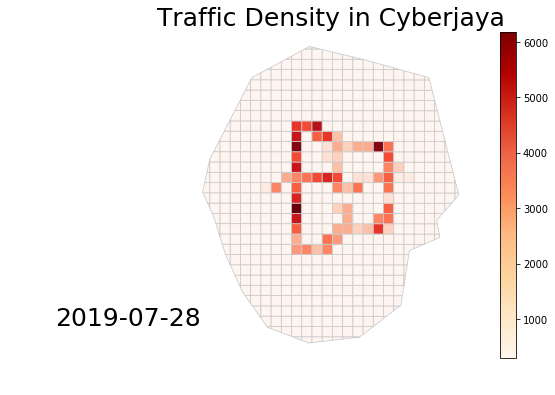

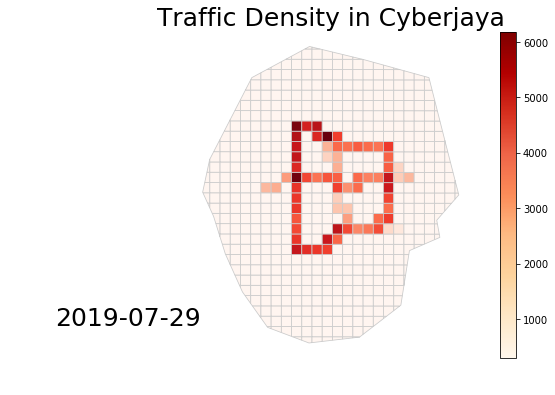

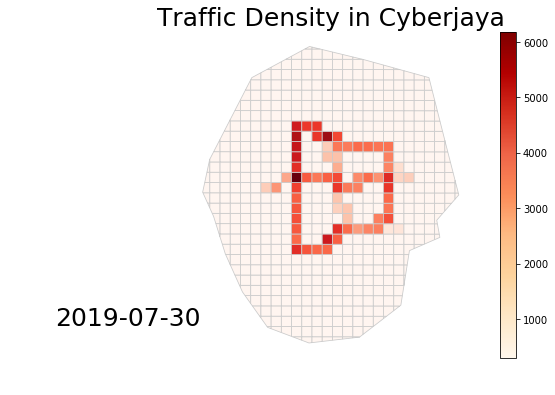

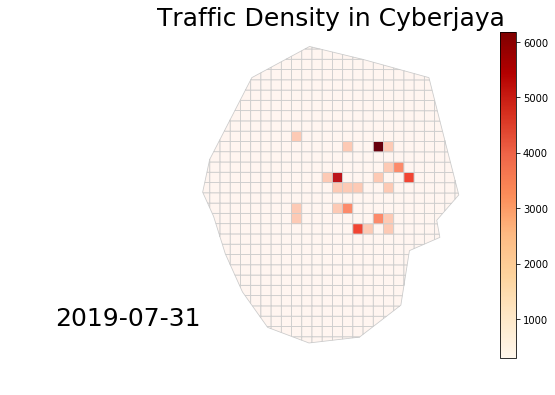

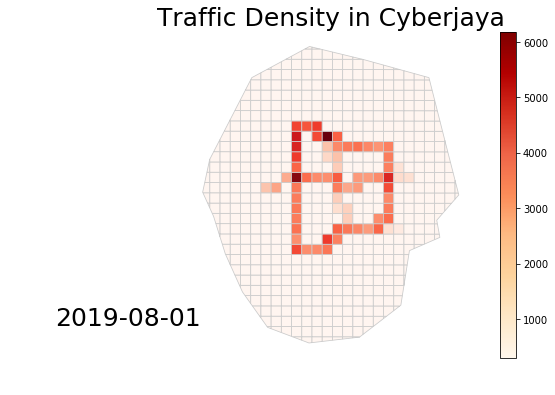

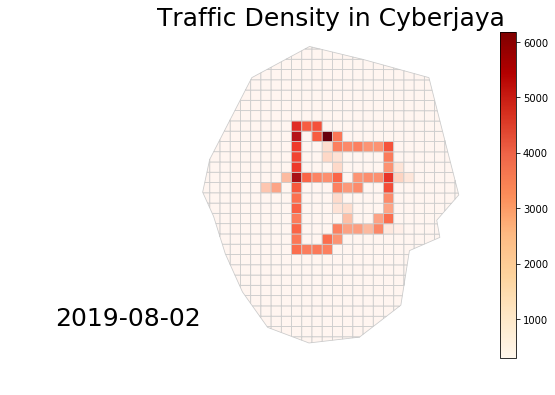

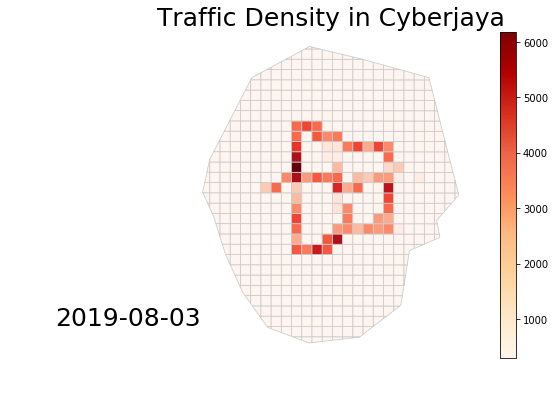

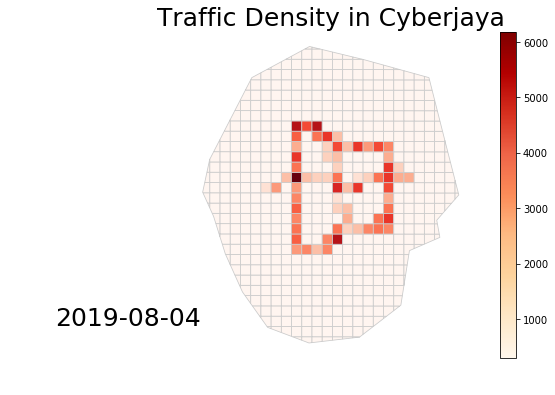

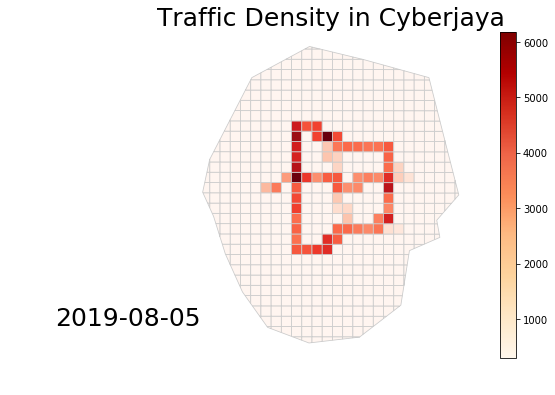

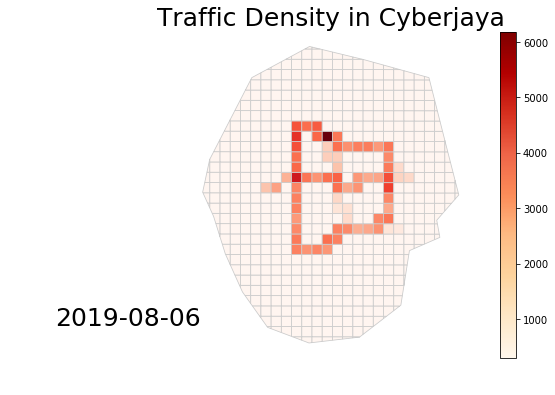

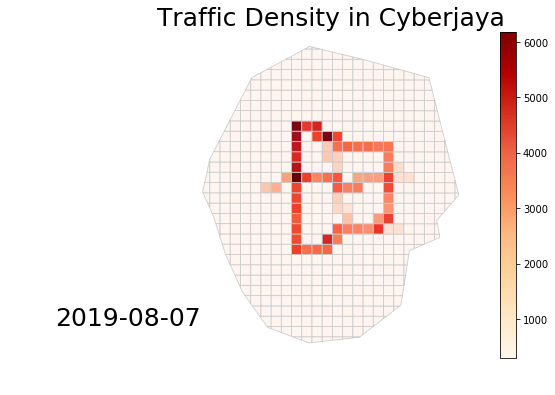

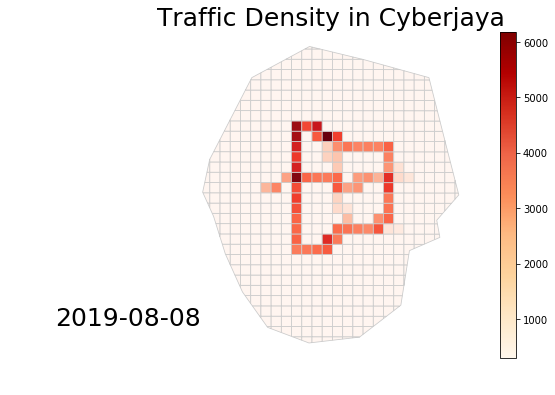

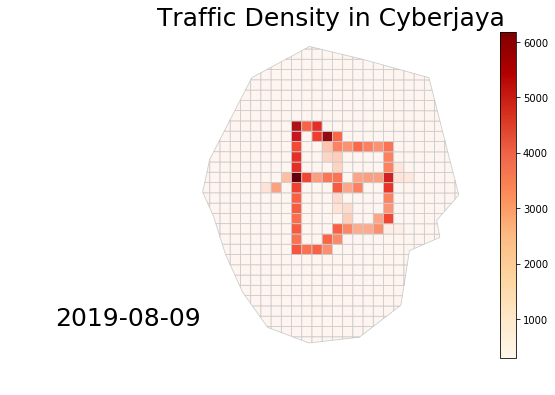

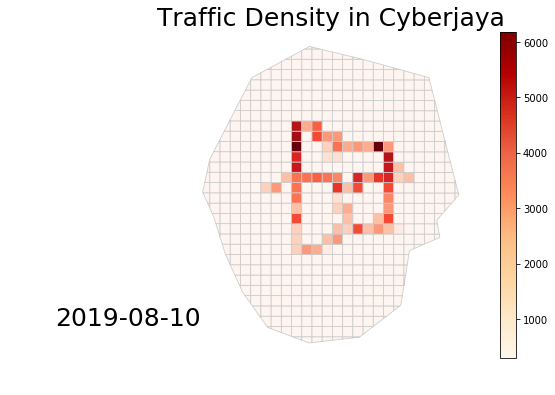

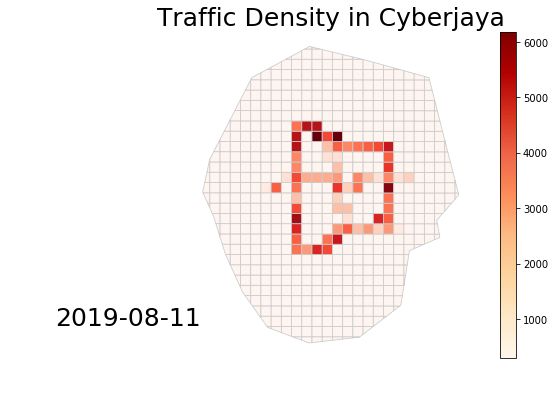

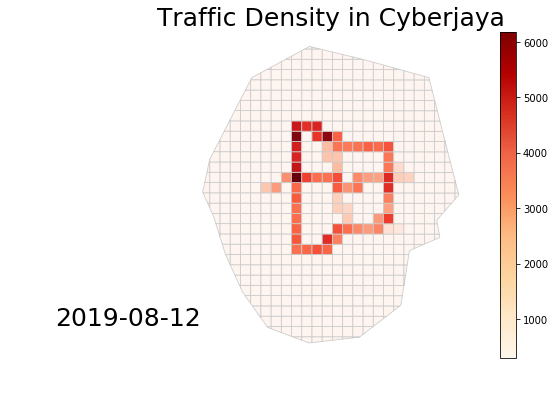

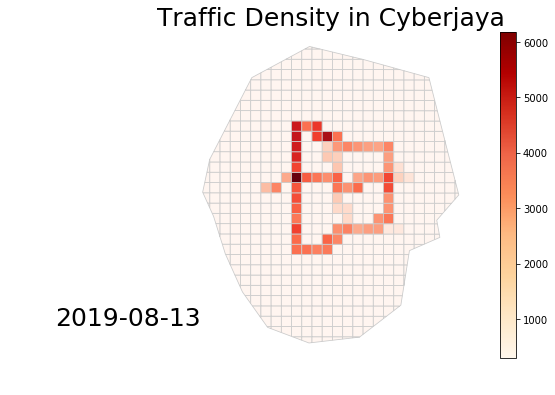

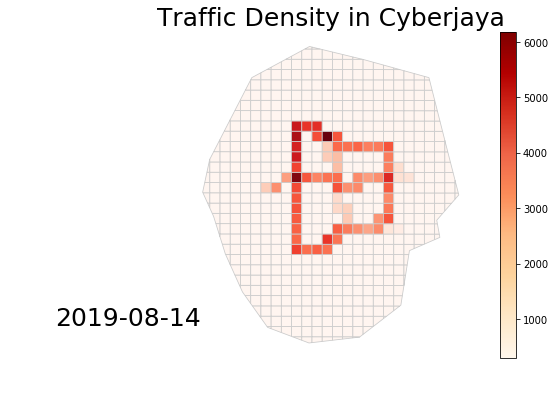

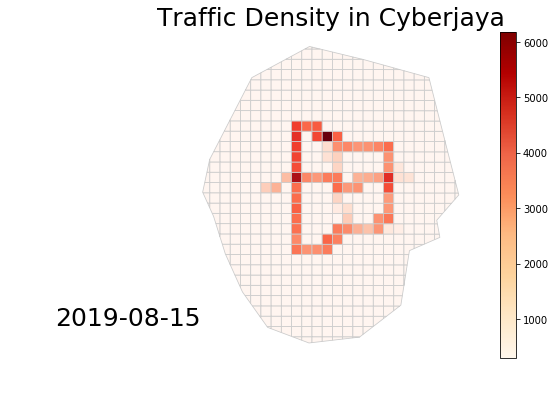

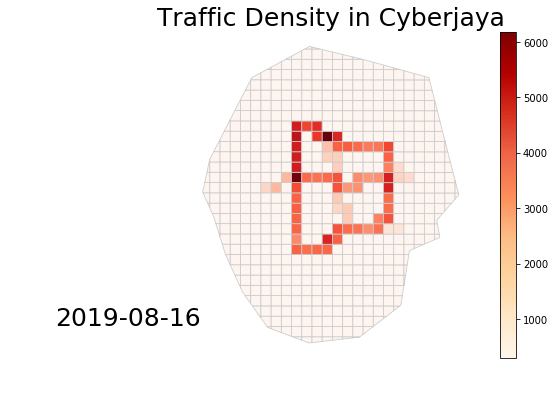

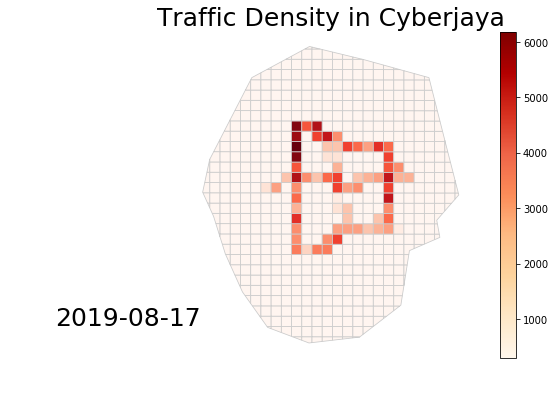

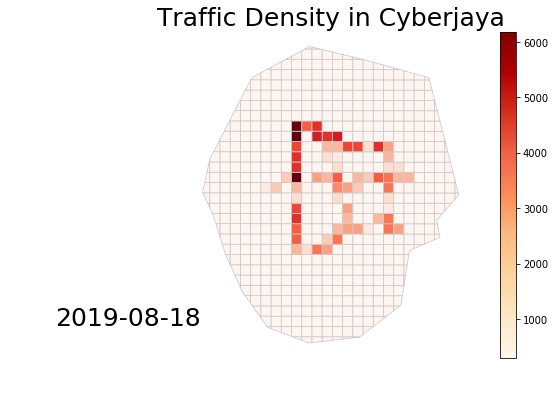

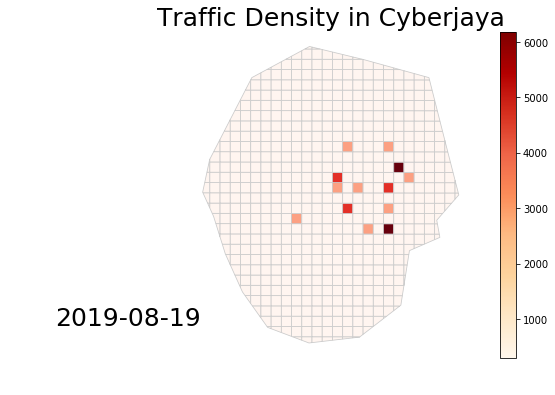

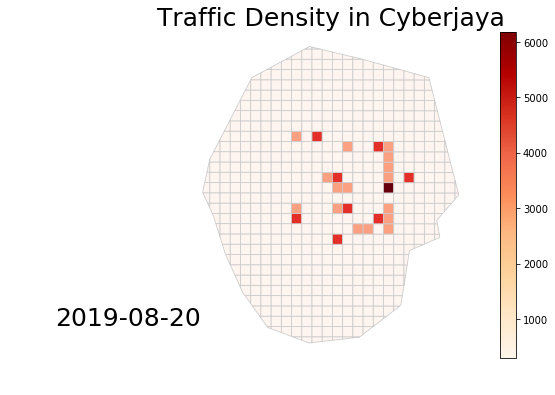

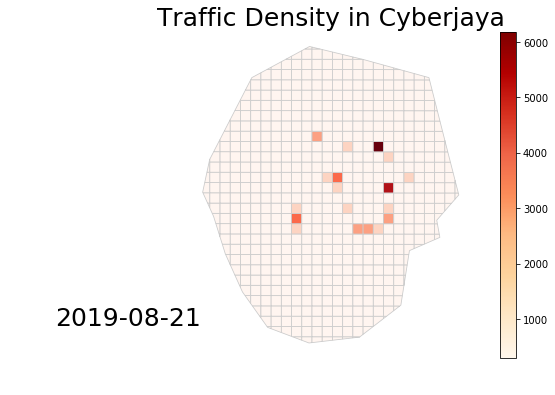

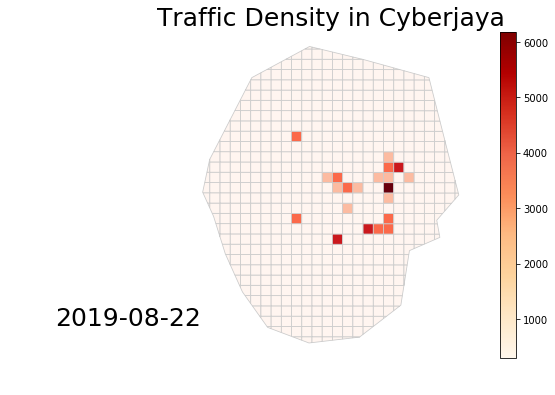

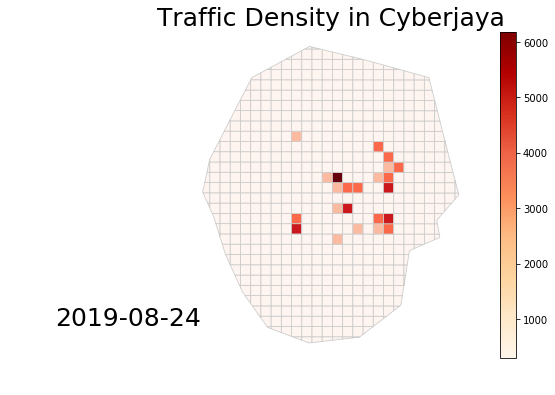

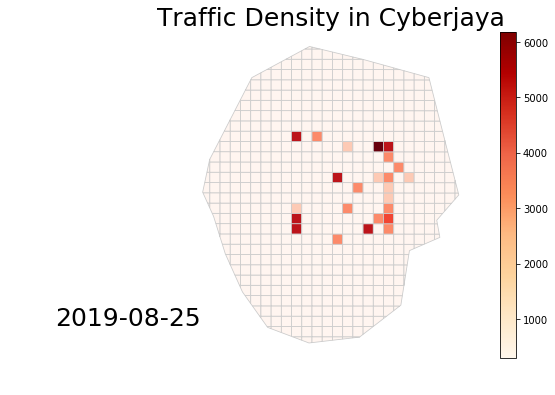

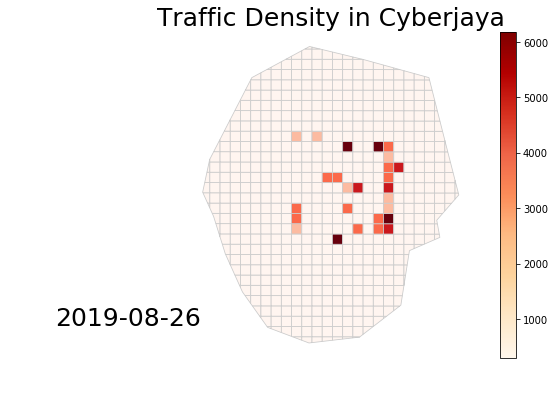

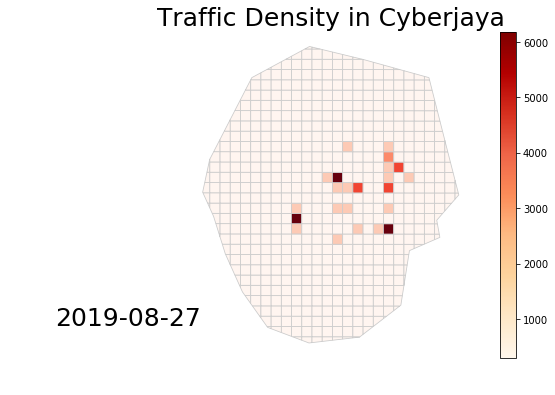

In [87]:
# start the for loop to create one map per year
for date in list_of_date:
    
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 6))
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    merged_moving.plot(column=date, cmap='Reds',figsize=(5,5), linewidth=0.8, ax=ax, edgecolor='0.8')
    
    # remove axis of chart
    ax.axis('off')
    
    ax.set_title('Traffic Density in Cyberjaya', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})
    
    # position the annotation to the bottom left
    ax.annotate(date,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=25)

    sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    #filepath = os.path.join(output_path, 'TrafficDensity.jpg')
    chart = ax.get_figure()
    chart.savefig("Traffic_Density" + date + ".png", dpi=300)